In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
import imblearn
print(imblearn.__version__)

0.8.0


In [21]:
df = pd.read_csv('train.csv')
df

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [22]:
from collections import Counter
from numpy import where
counter = Counter(df.target)
counter

Counter({0: 573518, 1: 21694})

In [23]:
y = df.target
X = df.drop(['target'], axis = 1)

In [31]:
X.drop(['id'], axis = 1,inplace=True)
X

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2,5,1,0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
1,1,1,7,0,0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
2,5,4,9,1,0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
3,0,1,2,0,0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,3,1,10,0,0,0,0,0,1,0,...,4,1,9,6,0,1,1,0,1,1
595208,5,1,3,0,0,0,0,0,1,0,...,4,1,3,8,1,0,1,0,1,1
595209,1,1,10,0,0,1,0,0,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,5,2,3,1,0,0,0,1,0,0,...,4,1,4,2,0,1,1,1,0,0


<AxesSubplot:xlabel='target', ylabel='count'>

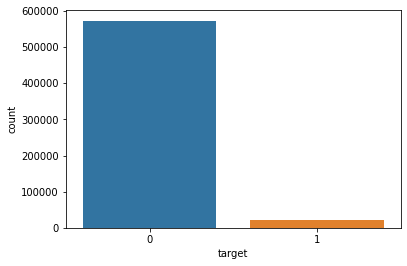

In [28]:
sns.countplot(y)

### XGBClassifier

In [29]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [34]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9635929874079114

In [36]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
conf_matrix

array([[114709,      0],
       [  4334,      0]])

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114709
           1       0.00      0.00      0.00      4334

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

### Resampling
1. under resammpling
    - random under resampling
    - Tomek Links: Tomek links are pairs of very close instances, but of opposite classes. 
    - cluster centroids: generating centroids
2. over resampling
    - random over sampling
    - SMOTE (synthetic minority oversampling technique)
3. combining over sampling and under sampling

In [37]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X = pca.fit_transform(X)

X.shape

(595212, 2)

In [52]:
y.unique()

array([0, 1])

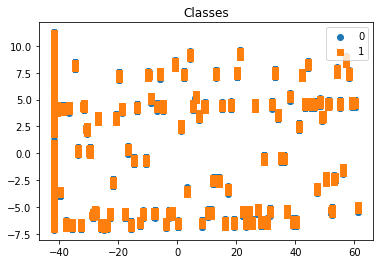

In [48]:
plot_2d_space(X,y)

#### under sampling

In [63]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X, y)

print(Counter(y_rus))

X_rus_train,X_rus_test, y_rus_train,y_rus_test = train_test_split(X_rus,y_rus,test_size=0.2,random_state=1)

model.fit(X_rus_train,y_rus_train)
y_pred_rus = model.predict(X_rus_test)

conf_matrix_rus = confusion_matrix(y_true=y_rus_test, y_pred = y_pred_rus)
print(conf_matrix_rus)
print(classification_report(y_rus_test,y_pred_rus))

Counter({0: 21694, 1: 21694})
[[2716 1681]
 [2201 2080]]
              precision    recall  f1-score   support

           0       0.55      0.62      0.58      4397
           1       0.55      0.49      0.52      4281

    accuracy                           0.55      8678
   macro avg       0.55      0.55      0.55      8678
weighted avg       0.55      0.55      0.55      8678



#### over sampling

In [65]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros,y_ros = ros.fit_resample(X,y)
print(X_ros.shape[0] - X.shape[0])

X_ros_train,X_ros_test, y_ros_train,y_ros_test = train_test_split(X_ros,y_ros,test_size=0.2,random_state=1)

model.fit(X_ros_train,y_ros_train)
y_pred_ros = model.predict(X_ros_test)

conf_matrix_ros = confusion_matrix(y_true=y_ros_test, y_pred = y_pred_ros)
print(conf_matrix_ros)
print(classification_report(y_ros_test,y_pred_ros))

551824
[[71657 43251]
 [57792 56708]]
              precision    recall  f1-score   support

           0       0.55      0.62      0.59    114908
           1       0.57      0.50      0.53    114500

    accuracy                           0.56    229408
   macro avg       0.56      0.56      0.56    229408
weighted avg       0.56      0.56      0.56    229408



In [67]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sam = smote.fit_resample(X, y)

print(X_sm.shape[0]-X.shape[0])

551824


#### over-sampling followed by under-sampling

In [68]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek()
X_smt, y_smt = smt.fit_resample(X,y)

In [69]:
X_smt_train,X_smt_test, y_smt_train,y_smt_test = train_test_split(X_smt,y_smt,test_size=0.2,random_state=1)

model.fit(X_smt_train,y_smt_train)
y_pred_smt = model.predict(X_smt_test)

conf_matrix_smt = confusion_matrix(y_true=y_smt_test, y_pred = y_pred_smt)
print(conf_matrix_smt)
print(classification_report(y_smt_test,y_pred_smt))

[[63405 40271]
 [49383 53652]]
              precision    recall  f1-score   support

           0       0.56      0.61      0.59    103676
           1       0.57      0.52      0.54    103035

    accuracy                           0.57    206711
   macro avg       0.57      0.57      0.57    206711
weighted avg       0.57      0.57      0.57    206711

